# Companion to the chapter 9 of LA4DS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from latools import projection, second_projection, enorm
import math

In [2]:
A = 1/2**0.5 * np.array([[1, 1], [-1, 1]])

(-2.0, 2.0, -2.0, 2.0)

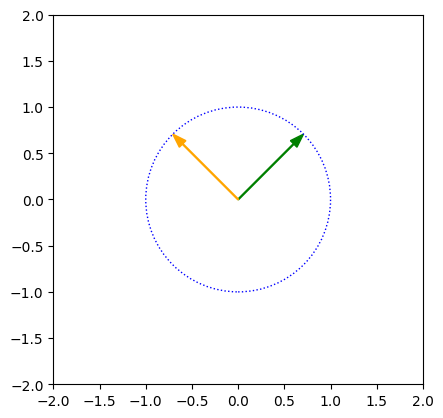

In [3]:
plt.arrow(0,0, *A[0], color = 'green', length_includes_head=True, width=0.01, head_width=0.1)
plt.arrow(0,0, *A[1], color = 'orange', length_includes_head=True, width=0.01, head_width=0.1)
circle1 = plt.Circle((0, 0), 1, color='b', fill=False, linestyle=':', linewidth=1)
plt.gca().add_patch(circle1)

plt.axis('square')
plt.axis([-2,2,-2,2])

Let's try ortogonalization

In [62]:
B = np.random.randint(-5, 5, (2,2))
B

array([[-3, -1],
       [ 3, -4]])

In [63]:
# First column
q_0 = enorm(B[0], 1)
q_0

array([-0.9486833 , -0.31622777])

In [64]:
help(second_projection)

Help on function second_projection in module latools:

second_projection(projected, base)
    Calculates the projection ortogonal to the base



In [65]:
# Second column
q_1 = enorm(second_projection(B[1], q_0), 1)
q_1

array([ 0.31622777, -0.9486833 ])

In [66]:
Q = np.array([q_0, q_1])
Q

array([[-0.9486833 , -0.31622777],
       [ 0.31622777, -0.9486833 ]])

(-3.3, 3.3, -4.200237170824512, 2.3997628291754873)

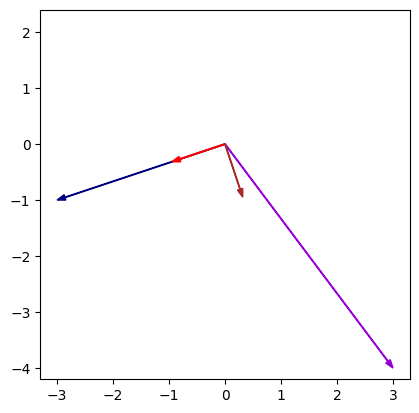

In [67]:
plt.arrow(0,0, *B[0], color='navy', width=0.01,length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *B[1], color='darkviolet', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *q_0, color='r', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *q_1, color='brown', width=0.01, length_includes_head=True, head_width=0.1)

plt.axis([-6, 6, -6, 6])
plt.axis('square')

In [68]:
# NB! We used the row-vector space due to the programmming comfort
# That's why now we transpose matrices in order to return to LA

Q = Q.T
B = B.T

In [71]:
# Let us see that QtQ is E

np.round(Q.T @ Q, 5)

array([[ 1., -0.],
       [-0.,  1.]])

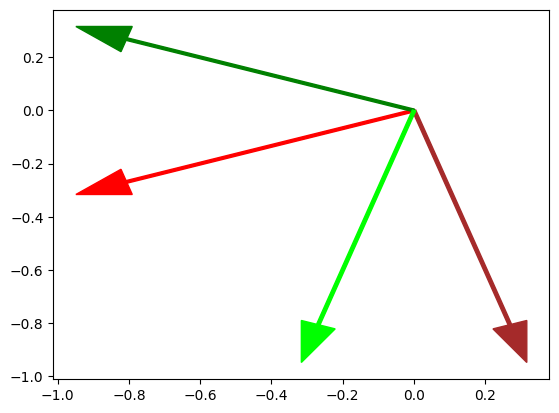

In [72]:
plt.arrow(0,0, *Q[:,0], color='r', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *Q[:,1], color='brown', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *Q[0], color='green', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *Q[1], color='lime', width=0.01, length_includes_head=True, head_width=0.1)

In [75]:
# Now let-s find a QR ortogonalization

# B = QR
# QtB = QtQR
# QtB = R

R = np.round(Q.T @ B, 5)
R

array([[ 3.16228, -1.58114],
       [-0.     ,  4.74342]])

(-1.818311, 4.443002627855565, -1.2332884629530394, 5.028025164902526)

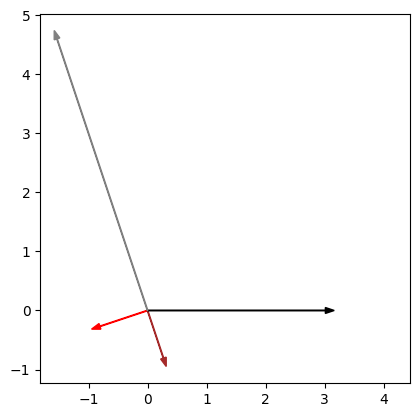

In [77]:
plt.arrow(0,0, *Q[:,0], color='r', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *Q[:,1], color='brown', width=0.01, length_includes_head=True, head_width=0.1)

plt.arrow(0,0, *R[:,0], color='k', width=0.01, length_includes_head=True, head_width=0.1)
plt.arrow(0,0, *R[:,1], color='gray', width=0.01, length_includes_head=True, head_width=0.1)

plt.axis('square')